## Modélisation de la survie d'un individu dans un milieu hostile.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from matplotlib import colors

# Fonctions Humain

La fonction suivante renvoie les jours restants avant la construction de l'abri, si l'abri est construit, si l'agent est secouru(e) en trouvant un village, s'il possède une source infini. 

In [31]:
def construction_abri(cap , source_inf , vegr , veg , s , jourres , abri):
    """float*bool*int*float*int*bool => bool*int*bool*bool"""
    #sauve:bool
    sauve = False
    #rand:float
    if jourres != 0:
        jourres = jourres - 1
    else:
        abri = True
    if jourres == -11 or vegr == 0:
        jourres = ((45/(cap*0.5)//10 * 1/(veg/5)))/1.
        abri = False
        source_inf = False
        rand = np.random.random_sample()
        if rand < s:
            sauve = True
    jourres = jourres//1

    return jourres , abri , sauve , source_inf

In [32]:
construction_abri(0.1,False,1,20,0.1,-10,False)

(22.0, False, False, False)

Renvoie l'hydratation de l'agent après qu'il soit allé chercher de l'eau 

In [33]:
def trouver_eau(p_eau , capadap , source_inf , hydrat):
    """float*float*bool*float => bool*float"""
    b=0
    if source_inf == 1:
        hydrat = 1
    else:
        rand = np.random.random_sample()
        if rand <= 0.4*p_eau*(2.5*capadap):
            hydrat = hydrat + 0.25
        elif rand <= p_eau*(5*capadap) :
            hydrat = hydrat + 0.5
            rand=np.random.random_sample()
            if rand > 0.4: 
                source_inf = True
    if hydrat > 1:
        hydrat = 1
    return source_inf , hydrat

La fonction suivante renvoie la santé de l'agent après qu'il soit allé chercher des vegetaux et le nombre de vegetaux restants

In [34]:
 def inter_veget(veg,alimentation,capadap,vegre):
    """int*float*float=>int*float"""
    #p_vg:float
    p_vg=0.6
    #trouve:bool
    trouve=True
    #vegr:int
    vegr=vegre
    if vegr == 0:
        vegr = veg
    while vegr>0 and trouve==True:
        rand=np.random.random_sample()
        if rand * capadap < p_vg:
            alimentation = alimentation + (0.08 * capadap)
            vegr = vegr - 1
            p_vg = p_vg-0.1
        else:
            trouve=False
    if alimentation > 1:
        alimentation = 1
    return alimentation , vegr

La fonction suivante renvoie l'alimentation de l'agent apres son interaction possible avec des animaux non dangereux

In [35]:

def inter_anim(p_a, force, capadap, alimentation, sante,c):
    """
    float ^6 -> float ^2
    hyp : 
    """
 
    random1 = np.random.random_sample()
    if random1 <= p_a : 
        alimentation = alimentation + 0.15
    if alimentation > 1:
        alimentation = 1.0
        
    return alimentation , sante , c

Renvoie la santé et la force en fonction de l'alimentation et hydratation 

In [36]:
def sante_fct_hydr_alim(alimentation,hydratation,sante,abri,force,c):
    """float³=>float
    force en fonction de l'alimentation et hydratation"""
    
    if abri==True:
        sante=sante+0.025
    
    if alimentation >= 0.7 and hydratation >=0.7:
        if sante<0.2:
            sante = 0.2
        else:
            sante = sante + 0.05
    elif alimentation>=0.5 and hydratation >=0.5:
        alimentation=alimentation
    elif alimentation<0.5 :
        if hydratation<0.5:
            sante = sante - ((0.5-alimentation)*0.7 + (0.5-hydratation)*0.9)
        else:
            sante = sante - (0.5-alimentation)*0.5
    else:
        sante = sante - (0.6-hydratation)
    if sante <=0:
        sante=0
        c="Mort d'épuisement"
    if sante > 1.0 :
        sante = 1.0
    
    if sante >=0.3 and force<=1.0:
        force=force+0.01
    elif force>=0.1:
        force=force-0.05
    
    
    hydratation=hydratation-0.3
    alimentation=alimentation-0.15
    if hydratation <= 0:
        hydratation =0
        c = "Mort de déshydratation"
        sante = 0
    if alimentation <= 0:
        alimentation = 0
        c = "Mort de faim"
        sante = 0
    return sante,alimentation,hydratation,force,c

Detetermine retourne si l agent est secouru par une equipe de secours

In [37]:
def secouru(p_s, j,p_s_ini,p_s_10):
    """
    float * int -> bool 
    hyp :
    retourne si l agent est secouru par une equipe de secours
    """


    #secouru : bool
    secouru = False

    if j <= 10 :
        p_s = p_s + p_s_ini*0.2
    elif j <= 25 :
        p_s_10 = p_s
    else :
        p_s = p_s - p_s_10*0.2
    
    random5=np.random.random_sample()
    secouru = random5 <= p_s

    return secouru , p_s


In [38]:
secouru(0.008666657999999999,0,0.00666666,0)

(False, 0.009999989999999999)

In [39]:
def model(jour,Lsante):
    """int*list[float]"""
    Ljour=[]
    for i in range(0,jour):
        Ljour.append(i+1)
    plt.bar(Ljour,Lsante , color='green' )
   

## FONCTIONS PREDATEUR

Retourne le niveau d'alimentation et d'hydratation du predateur

In [40]:
def nourriture_p(p_a, alimentation_p, p_e, hydrat_p):
    """
    float^4 -> float^2
    retourne le niveau d alimentation et d hydratation du predateur
    """
    
    rand = np.random.random_sample()
    if rand <= 1.5*p_a:
        alimentation_p = alimentation_p + 0.15
    if alimentation_p >1 :
        alimentation_p = 1
    if rand <= 1.3*p_e:
        hydrat_p = hydrat_p + 0.4
    if hydrat_p > 1:
        hydrat_p = 1
    return alimentation_p,hydrat_p

Retourne le niveau d alimentation du predateur jour apres jour

In [41]:
def ev_nourriture_p(alimentation_p, hydrat_p):
    """
    float^2 -> float^2
    retourne le niveau d alimentation du predateur jour apres jour
    """
    alimentation_p = alimentation_p - 0.1
    hydrat_p = hydrat_p - 0.3
    return alimentation_p, hydrat_p

Retourne si le predateur meurt de faim ou deshydratation

In [42]:
def mort_p_nourriture(alimentation_p, hydrat_p):
    """
    float^2 -> bool
    retourne si le predateur meurt de faim ou deshydratation
    """
    if alimentation_p <= 0 or hydrat_p <=0 :
        return True
    else :
        return False

Retourne l'issue du combat entre le predateur et l'humain

In [43]:
def combat_p_h(force,cap,dang_p):
    """
    float^4 -> float * bool
    retourne l'issue du combat entre le predateur et l'humain
    """
    mort=False
    rand = np.random.random_sample()
    res = rand*(dang_p+0.45)*(cap-1.65)*(force-1.65)
        
    
    return res

Retourne le niveau de sante et d alimentation en fonction de l'issue du combat, et la cause de la mort si l agent humain meurt

In [44]:
def sante_apres_combat(res,alimentation,sante,alimentation_p,sante_p):
    """
    float ^5 -> float ^4 * str
    retourne le niveau de sante et d alimentation en fonction de l'issue du combat, 
    et la cause de la mort si l agent humain meurt
    """
    #c : str
    c=""
    if res < 0.16 :
        alimentation = alimentation + 0.15
        sante_p = 0
        c = "le prédateur est tué par l'humain"
    elif res < 0.33 :
        alimentation = alimentation + 0.15
        sante = sante - res
        sante_p = 0
        c = " le prédateur est tué par l'humain"
    elif res < 0.5 :
        sante_p = sante_p - (1 - res)
    elif res < 0.66 :
        sante = sante - res
        sante_p = sante_p - (1 - res)
    elif res < 0.8 :
        sante = 0
        sante_p = sante_p - (1 - res)
        c = "l'humain est tué par le prédateur"
    else :
        sante = 0
        c = "l'humain est tué par le prédateur"
    return alimentation, sante, alimentation_p, sante_p , c
    

Retourne la sante du prédateur en fonction de son alimentation et hydratation

In [45]:
def sante_fct_hydr_alim_p(alimentation_p, hydrat_p, sante_p):
    """
    float ^3 -> float
    retourne la sante du prédateur en fonction de son alimentation et hydratation
    """
    
    if alimentation_p >= 0.5 and hydrat_p >=0.5:
        if sante_p<0.3:
              sante_p = 0.3
        else:
              sante_p = sante_p + 0.1
    elif alimentation_p < 0.5 :
        if hydrat_p < 0.5:
            sante_p = sante_p - ((0.5-alimentation_p)*0.5 + (0.5-hydrat_p)*0.8)
        else:
            sante_p = sante_p - (0.5-alimentation_p)*0.4
    else:
        sante_p = sante_p - (0.5-hydrat_p)*0.84
    if sante_p > 1.0 :
        sante_p = 1.0
    return sante_p

# Dictionnaires Agents

In [116]:
#dictionnaire_humain:dict[str:tuple[float,float]]
dictionnaire_humain={}
dictionnaire_humain["professionnel"]=(0.8,0.9)
dictionnaire_humain["bureaucrate"]=(0.2,0.3)
dictionnaire_humain["moyen"]=(0.5,0.5)
dictionnaire_humain["Maxime"]=(0.1,0.1)

#dictionnaire_biome:dict[str:tuple[float,float,int,float,float,float]]
dictionnaire_biome={}
dictionnaire_biome["Amazonie"]=(0.65,3,33,0.7,0.03571428571,0.007142857142)
dictionnaire_biome["Alaska"]=(0.38,2,18,0.6,0.00043185564,0.0086371128)
dictionnaire_biome["France"]=(0.3,0.5,17,0.6,0.03,0.06)
dictionnaire_biome["Sahara"]=(0.25,2,1,0.1,0.00333333,0.00666666)

#dictionnaire_predateur:dict[str:tuple[float]]
dictionnaire_predateur={}
dictionnaire_predateur["jaguar"]=(0.7)      #-> amazonie
dictionnaire_predateur["guepard"]=(0.7)      #-> sahara
dictionnaire_predateur["grizzly"]=(0.9)     #-> alaska
dictionnaire_predateur["sanglier"]=(0.4)    #-> france

In [47]:
def nouveau_humain(nom,force,cap):
    """
    str * float^2 -> dict[str:tuple[float,float]]
    hyp: len(nom) >= 1 and force >0 and force <1 and cap >0 and cap <1
    retourne le dictionnaire des agents augmenté de l agent créé
    """
    dictionnaire_humain[nom]=(force,cap)
    return dictionnaire_humain


In [48]:
def nouveau_biome(nom,p_a,p_ap,veg,p_e,p_v,p_s):
    """
    str * float^6 -> dict[str:tuple[float,float,int,float,float,float]]
    hyp: len(nom) >= 1 and 0< p_a <1 and 0< p_ap <1 and 0< veg and 0< p_e <1 and 0< p_v <1 and 0< p_s <1
    retourne le dictionnaire des biomes augmenté du biome créé
    """
    dictionnaire_biome[nom]=(p_a,p_ap,veg,p_e,p_v,p_s)

In [49]:
nouveau_humain("Timotuc",2,2)

{'Maxime': (0.1, 0.1),
 'Timotuc': (2, 2),
 'bureaucrate': (0.2, 0.3),
 'moyen': (0.5, 0.5),
 'professionnel': (0.8, 0.9)}

# Modélisation/déplacements

Retourne la modélisation graphique (en couleur) de la matrice correspondant à un biome

In [50]:
def generation_matrice(taille,p_e,nb_pred):
    

    #Création d'une matrice carré, représentant l'environnement, couleurs définies en fonction de la quantité d'eau
    # dans le biome.
    #L_positions:list[list[int,int,int]]
    L_positionsenv=[]
    
    if p_e<0.4:
        couleur=0
    else:
        couleur=-3
    for i in range(0,taille):
        for j in range(0,taille):
            rand = np.random.random_sample()
            if rand<0.34:
                L_positionsenv.append((couleur-2,i,j))
            elif rand<0.67 and rand>0.34:
                L_positionsenv.append((couleur-1,i,j))
            else:
                L_positionsenv.append((couleur,i,j))
    
    #Ajout des prédateurs et de l'humain à la matrice.
    
    nb_pre=nb_pred*taille//10
    #L_inter:list[int,int,int]
    L_inter=[]
    #L_positions:list[list[int,int,int]]
    L_positions=[]
    
    #nb_pre_fi:int
    nb_pre_fi=nb_pre
    
    #i:int
    i=0
    hor=-1
    ver=0
    while i<nb_pre_fi:
        if hor<2:
            hor=hor+1
        else:
            hor=0
            if ver<2:
                ver=ver+1
            else:
                ver=0
        if hor!=1 or ver!=1:
            cori=np.random.randint(hor*(taille/3),(hor+1)*(taille/3))
            corj=np.random.randint(ver*(taille/3),(ver+1)*(taille/3))
            L_positions.append((-10-i,cori,corj))
            i=i+1
    
    L_positions.append((1,taille//2,taille//2))
    
    return L_positions, L_positionsenv

In [51]:
generation_matrice(30,0.4,5)

([(-10, 1, 7),
  (-11, 19, 2),
  (-12, 22, 3),
  (-13, 4, 16),
  (-14, 27, 12),
  (-15, 4, 28),
  (-16, 12, 24),
  (-17, 23, 25),
  (-18, 4, 9),
  (-19, 14, 1),
  (-20, 24, 2),
  (-21, 0, 18),
  (-22, 25, 16),
  (-23, 6, 29),
  (-24, 17, 21),
  (1, 15, 15)],
 [(-4, 0, 0),
  (-3, 0, 1),
  (-5, 0, 2),
  (-5, 0, 3),
  (-4, 0, 4),
  (-3, 0, 5),
  (-5, 0, 6),
  (-5, 0, 7),
  (-5, 0, 8),
  (-4, 0, 9),
  (-5, 0, 10),
  (-4, 0, 11),
  (-5, 0, 12),
  (-5, 0, 13),
  (-5, 0, 14),
  (-4, 0, 15),
  (-4, 0, 16),
  (-5, 0, 17),
  (-4, 0, 18),
  (-3, 0, 19),
  (-5, 0, 20),
  (-5, 0, 21),
  (-5, 0, 22),
  (-3, 0, 23),
  (-4, 0, 24),
  (-4, 0, 25),
  (-3, 0, 26),
  (-4, 0, 27),
  (-5, 0, 28),
  (-4, 0, 29),
  (-4, 1, 0),
  (-5, 1, 1),
  (-4, 1, 2),
  (-5, 1, 3),
  (-4, 1, 4),
  (-3, 1, 5),
  (-4, 1, 6),
  (-5, 1, 7),
  (-3, 1, 8),
  (-5, 1, 9),
  (-4, 1, 10),
  (-5, 1, 11),
  (-5, 1, 12),
  (-4, 1, 13),
  (-5, 1, 14),
  (-3, 1, 15),
  (-3, 1, 16),
  (-4, 1, 17),
  (-5, 1, 18),
  (-4, 1, 19),
  (-4, 1, 2

In [105]:
def dessin(L,Lenv,taille,L_posod):
    
    mat=np.zeros((taille,taille))
    for j in range (0,len(Lenv)):
        num,cori,corj=Lenv[j]
        mat[cori,corj]=num
        
    for j in range (0,len(L_posod)):
        num,cori,corj=L_posod[j]
        mat[cori,corj]=num    

    for i in range(0,len(L)):
        num,cori,corj=L[i]
        mat[cori,corj]=num


        
    cmap = colors.ListedColormap(['red','green','green','green', 'green', 'orange','darkorange',
                                  'goldenrod','blue','black','black'])
    bounds = [-10,-6,-5,-4, -3, -2, -1, 0, 1,2,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    print(cmap,bounds,norm)

    fig = plt.figure()

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    grid = plt.imshow(mat, interpolation='nearest', cmap=cmap,
                          norm=norm)

    


    plt.show()

In [ ]:
 cmap = colors.ListedColormap(['red','white','yellowgreen','limegreen', 'olive', 'orange','darkorange',
                                  'goldenrod','blue','black','black'])

In [53]:
mattest,L=generation_matrice(13,0.1,460)
mattest

[(-10, 2, 3),
 (-11, 5, 1),
 (-12, 11, 3),
 (-13, 1, 4),
 (-14, 11, 5),
 (-15, 2, 11),
 (-16, 7, 9),
 (-17, 10, 9),
 (-18, 2, 2),
 (-19, 5, 1),
 (-20, 10, 0),
 (-21, 1, 4),
 (-22, 12, 7),
 (-23, 1, 8),
 (-24, 5, 10),
 (-25, 11, 10),
 (-26, 0, 0),
 (-27, 7, 1),
 (-28, 9, 0),
 (-29, 3, 5),
 (-30, 8, 4),
 (-31, 2, 9),
 (-32, 5, 8),
 (-33, 9, 10),
 (-34, 3, 0),
 (-35, 5, 1),
 (-36, 10, 2),
 (-37, 0, 7),
 (-38, 12, 6),
 (-39, 0, 9),
 (-40, 5, 12),
 (-41, 12, 11),
 (-42, 0, 1),
 (-43, 4, 3),
 (-44, 11, 2),
 (-45, 3, 4),
 (-46, 10, 6),
 (-47, 0, 8),
 (-48, 5, 11),
 (-49, 11, 10),
 (-50, 0, 2),
 (-51, 4, 0),
 (-52, 10, 1),
 (-53, 2, 6),
 (-54, 12, 5),
 (-55, 3, 11),
 (-56, 7, 8),
 (-57, 8, 12),
 (-58, 1, 0),
 (-59, 7, 1),
 (-60, 8, 2),
 (-61, 2, 4),
 (-62, 11, 7),
 (-63, 1, 10),
 (-64, 4, 11),
 (-65, 12, 12),
 (-66, 2, 0),
 (-67, 6, 3),
 (-68, 8, 2),
 (-69, 1, 6),
 (-70, 10, 7),
 (-71, 2, 11),
 (-72, 5, 9),
 (-73, 11, 11),
 (-74, 0, 0),
 (-75, 4, 1),
 (-76, 11, 3),
 (-77, 0, 7),
 (-78, 9, 5),


[[ -4.  -5.  -4.  -3.  -4.  -3.  -4.  -5.  -3.  -3.  -5.  -5.  -5. -21.
   -3.  -4.  -3.  -5.  -3.  -4.  -4.  -5.  -3.  -5.  -5.  -3.  -5.  -4.
   -5.  -5.]
 [ -3.  -4.  -4.  -3.  -5.  -3.  -4.  -5.  -3.  -4.  -4.  -5.  -5.  -5.
   -5.  -3.  -3.  -5.  -3.  -3.  -3.  -3.  -5.  -5.  -4.  -4.  -5.  -5.
   -4.  -5.]
 [ -4.  -4.  -3.  -5.  -4.  -4. -18.  -5.  -5.  -4.  -5.  -4.  -5.  -5.
   -3.  -3.  -4.  -3.  -5.  -3.  -3.  -4.  -3.  -5.  -4.  -3.  -5.  -4.
   -4.  -4.]
 [ -5.  -5.  -5.  -3.  -5.  -3.  -3.  -5.  -3. -10.  -3.  -5.  -5.  -5.
   -3.  -4.  -4.  -4.  -4.  -5.  -3.  -5.  -5.  -4.  -3.  -5.  -3.  -4.
  -23.  -3.]
 [ -3.  -4.  -4.  -3.  -5.  -4.  -4.  -4.  -5.  -3.  -4.  -3.  -5.  -3.
   -5.  -5.  -4.  -4.  -5.  -4.  -4.  -5.  -3.  -3.  -4.  -5.  -4.  -4.
   -5.  -5.]
 [ -5.  -3.  -4.  -4.  -3.  -5.  -5.  -5.  -3.  -3.  -5. -13.  -4.  -4.
   -5.  -5.  -3.  -5.  -5.  -4.  -4.  -3.  -3.  -3.  -4.  -3.  -4.  -4.
   -5.  -4.]
 [ -5.  -5.  -3.  -3.  -5.  -4.  -3.  -4.  -5.  -4.  -3.  

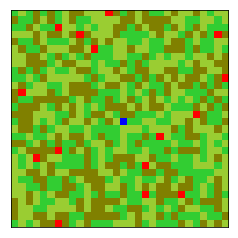

In [54]:
L_positions, L_positionsenv=generation_matrice(30,0.4,5)
dessin(L_positions, L_positionsenv,30)

In [55]:
dicti={}
dicti[(1,2)]=(5)
dicti[(1,2)]

5

Retourne la nouvelle position des agents

In [100]:
def deplacements(chang,L_pos,taille,L_env,jour,L_posod):
    

    
    L_posf=[]
    
    taille=taille-1
    #nb_pre:int
    nb_pre=0
    Combat=False
    #i:int
    for i in range (0,len(L_pos)):
        num,x,y = L_pos [i]
        print(num,x,y)
        if num <= -10:
            
            #e:int,fin:int // flag
            e=0
            fin=1
            #xf,yf:int*int //flag
            xf=0
            yf=0
            Li=len(L_pos)
            for j in range (0,len(L_pos)):
                numt,xt,yt = L_pos [i]
                if xt==x+1 or xt==x or xt==x-1:
                    if yt == y+1 or yt == y or yt == y-1:
                        if numt == 1:
                            x=xt
                            y=yt
                            fin=0
                        if numt > 1:
                            if e<numt:
                                e=numt
                                xf=xt
                                yf=yt
                                fin=2
            if j!=0 and fin==0:
                x=xf
                y=yf
            
            if fin==1:
                a=0
                while a==0:
                    n=(np.random.random_sample()*8)//2
                    if n>=3 and y!=0:
                        y=y-1
                        a=1
                    elif n>=2 and x!=taille:
                        x=x+1
                        a=1
                    elif n>=1 and y!=taille:
                        y=y+1
                        a=1
                    elif n>=0 and x!=0:
                        x=x-1
                        a=1
            L_posf.append((num,x,y))
            
        if num==1:
            if chang==True:
                dictitemp={}
                for j in range (0,len(L_env)):
                    numt,xt,yt=L_env[j]
                    dictitemp[(xt,yt)]=(numt)
                print(L_posod)
                for j in range (0,len(L_posod)):
                    numt,xt,yt=L_posod[j]
                    dictitemp[(xt,yt)]=(numt)
                print(dictitemp)
                a=0
                while a==0:
                    n=(np.random.random_sample()*8)//2
                    if n>=2.9 and n<=3.1 and y!=0:
                        if dictitemp[(x,y-1)]<2:
                            L_posod.append((jour,x,y))
                            y=y-1
                            L_posf.append((1,x,y))
                            a=1                                 
                                    
                    elif n>=1.9 and n<=2.1 and x!=taille:
                        if dictitemp[(x+1,y)]<2:
                            L_posod.append((jour,x,y))
                            x=x+1
                            L_posf.append((1,x,y))
                            a=1
                            
                    elif n>=0.9 and n<=1.1 and y!=taille:
                        if dictitemp[(x,y+1)]<2:
                            L_posod.append((jour,x,y))
                            y=y+1
                            L_posf.append((1,x,y))
                            a=1
                    elif n>=-0.1 and n<=0.1 and x!=0:
                        if dictitemp[(x-1,y)]<2:
                            L_posod.append((jour,x,y))
                            x=x-1
                            L_posf.append((1,x,y))
                            a=1
            
                    if x!=0:
                        if dictitemp[(x-1,y)]>=2:
                            ha=False
                    else:
                        ha=False
                    if y!=0:
                        if dictitemp[(x,y-1)]>=2:
                            ga=False
                    else:
                        ga=False
                    if y!=taille:
                        if dictitemp[(x,y+1)]>=2:
                            da=False
                    else:
                        da=False
                    if x!=taille:
                        if dictitemp[(x+1,y)]>=2:
                            ba=False
                    else:
                        ba=False
            if chang==False:
                L_posf.append((1,x,y))

            for k in range (0,len(L_pos)):
                numf,xf,yf=L_pos[k]
                if xf==x and yf==y and numf<=-10:
                    Combat=True
                        
    

    return L_posf,Combat,L_posod

In [101]:
def simul_depla(L_env,L,change,taille,j,L_posod):
    
    L , Combat , L_posod = deplacements(change,L,taille,L_env,j,L_posod) 
    dessin(L,L_env,taille, L_posod)
    

    return L,Combat,L_posod

# Simulations

Boucle principale, retourne le nombre de jours survécus par l'agent

In [113]:


def simulation_survie(agent,biome,predateur,taille):
    """str*str*dict[str:tuple[float,float]]*dict[str:tuple[float,float,int,float,float,float]] -> int """
    
    #c : cause de la fin
    c = ""
    #j : compteur jour
    j = 0
    #jour_r:float
    jour_r=-10
    #abri:bool
    abri=False
    #sauve:bool
    sauve=False
    #sourceinf:bool
    source_inf=False
    #sante:float
    sante=1.0
    #hydrat:float
    hydrat=1.0
    #alimentation:float
    alimentation=1.0
    #alimentation_p:float
    alimentation_p=1.0
    #hydrat_p:float
    hydrat_p=1.0
    #sante_p:float
    sante_p=1.0
    
    #Lsante:list[float]
    Lsante=[]
    Leau=[]
    

    dang_p = dictionnaire_predateur[predateur]
    force , capadap = dictionnaire_humain[agent]
    p_a , nb_p, veg , p_e , p_v , p_s = dictionnaire_biome[biome]
    vegr=veg
    p_s_ini = p_s
    p_s_10=p_s
    
    
    L_posod=[]
    L_pos,L_env = generation_matrice (taille, p_e, nb_p)

    
    while sante > 0 and sauve != True:
  

        chang=False
        jour_r , abri , sauve , source_inf = construction_abri(capadap , source_inf , vegr , veg , p_v , jour_r , abri)
        
        if vegr==0:
            chang=True
        
        sourceinf , hydrat  = trouver_eau(p_e , capadap , source_inf , hydrat)
        
        #alimentation , sante , c  = inter_anim(p_a, force, capadap, alimentation, sante, c)
        
        
        
        
        if c != "":
            print(model(j,Lsante),Lsante)
            return j, c,sante
        
        alimentation , vegr = inter_veget(veg,alimentation,capadap,vegr)
        
        sante , alimentation , hydrat , force , c = sante_fct_hydr_alim(alimentation, hydrat, sante,abri,force,c)
        
        sauve , p_s = secouru (p_s,j,p_s_ini,p_s_10)
        
        #alimentation_p,hydrat_p = nourriture_p(p_a, alimentation_p, p_e, hydrat_p)
        
        alimentation_p, hydrat_p = ev_nourriture_p(alimentation_p, hydrat_p)
        
        sante_fct_hydr_alim_p(alimentation_p, hydrat_p, sante_p)
        
 
        L_pos , Combat ,L_posod = simul_depla(L_env,L_pos,chang,taille,j,L_posod)

        
        if Combat == True:
            res = combat_p_h(force,capadap,dang_p,)
            sante_p = alimentation, sante, alimentation_p, sante_p , b = sante_apres_combat(res,alimentation,sante,alimentation_p,sante_p)
            print(b)
        Lsante.append(sante)
        Leau.append(hydrat)
        #Définition de la capacité de survie a x jour
        
        if j==10:
            p_s_10 = p_s
        
        #Augmentation de la capacité d'adaptation
        if capadap<1.0:
            capadap=capadap+0.01
       
        
        j=j+1
        
        
        print(sante,Combat)
    #print(model(j,Lsante),Lsante)
    if sauve==True:
        c="Sauvé!"
    return j, c,sante




In [103]:
def test(a,b,c):
    comp=0
    while a!=0:
        aa,ab,ah=simulation_survie(b,c)
        if ah!=0:
            comp=comp+1
        a=a-1
    return simulation_survie(b,c),comp

-10 1 0
-11 8 5
-12 19 2
-13 4 6
-14 16 11
-15 4 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB698E5080> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB698E5F98>


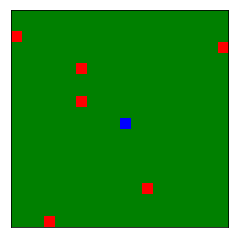

1.0 False
-10 2 0
-11 8 6
-12 19 3
-13 5 6
-14 16 12
-15 3 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB6990F128> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6990F198>


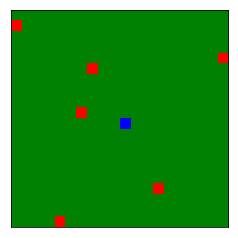

1.0 False
-10 1 0
-11 9 6
-12 19 4
-13 5 7
-14 16 13
-15 4 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB693BC320> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB693BC4A8>


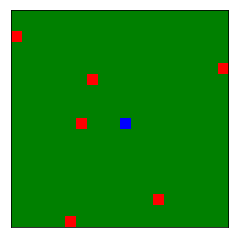

1.0 False
-10 2 0
-11 10 6
-12 19 5
-13 6 7
-14 17 13
-15 5 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB69A56518> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69A562B0>


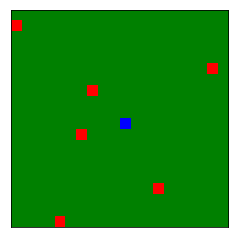

1.0 False
-10 1 0
-11 11 6
-12 19 4
-13 7 7
-14 16 13
-15 5 18
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB6ABD8C18> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6ABD87F0>


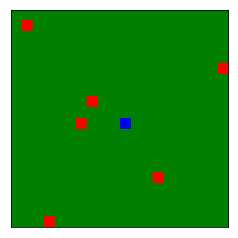

1.0 False
-10 1 1
-11 10 6
-12 19 3
-13 8 7
-14 15 13
-15 5 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AB3ADA0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AB3AEF0>


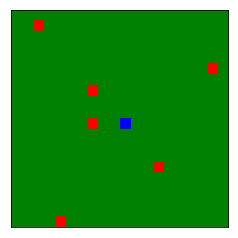

1.0 False
-10 1 2
-11 10 7
-12 19 4
-13 7 7
-14 14 13
-15 5 18
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB69944C88> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69944CC0>


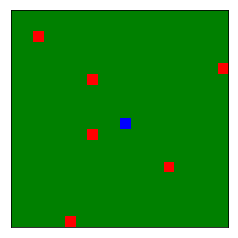

1.0 False
-10 2 2
-11 11 7
-12 19 5
-13 6 7
-14 14 14
-15 5 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB69943588> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69943EB8>


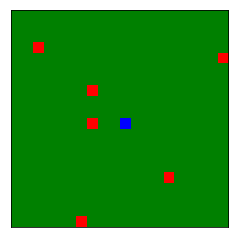

1.0 False
-10 3 2
-11 10 7
-12 19 6
-13 7 7
-14 15 14
-15 4 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB69884898> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69884B38>


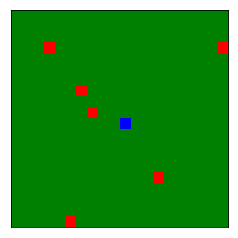

1.0 False
-10 3 3
-11 9 7
-12 19 5
-13 7 6
-14 15 13
-15 3 19
1 10 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AB3AEF0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AB3AC18>


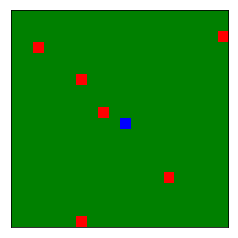

1.0 False
-10 3 2
-11 9 8
-12 19 6
-13 6 6
-14 15 14
-15 2 19
1 10 10
[]
{(0, 0): -5, (0, 1): -3, (0, 2): -3, (0, 3): -5, (0, 4): -5, (0, 5): -3, (0, 6): -4, (0, 7): -4, (0, 8): -3, (0, 9): -3, (0, 10): -4, (0, 11): -3, (0, 12): -4, (0, 13): -3, (0, 14): -3, (0, 15): -5, (0, 16): -5, (0, 17): -3, (0, 18): -5, (0, 19): -5, (1, 0): -4, (1, 1): -4, (1, 2): -4, (1, 3): -5, (1, 4): -5, (1, 5): -3, (1, 6): -5, (1, 7): -3, (1, 8): -5, (1, 9): -3, (1, 10): -3, (1, 11): -4, (1, 12): -3, (1, 13): -3, (1, 14): -5, (1, 15): -5, (1, 16): -5, (1, 17): -5, (1, 18): -4, (1, 19): -4, (2, 0): -4, (2, 1): -4, (2, 2): -4, (2, 3): -4, (2, 4): -5, (2, 5): -5, (2, 6): -5, (2, 7): -5, (2, 8): -5, (2, 9): -4, (2, 10): -3, (2, 11): -3, (2, 12): -3, (2, 13): -4, (2, 14): -4, (2, 15): -3, (2, 16): -5, (2, 17): -4, (2, 18): -3, (2, 19): -4, (3, 0): -5, (3, 1): -5, (3, 2): -4, (3, 3): -5, (3, 4): -4, (3, 5): -4, (3, 6): -5, (3, 7): -4, (3, 8): -4, (3, 9): -4, (3, 10): -3, (3, 11): -4, (3, 12): -3, (3, 13): -3, (3, 

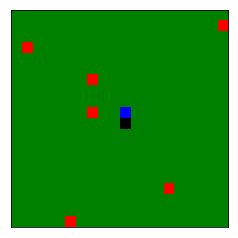

1.0 False
-10 3 1
-11 9 7
-12 19 5
-13 6 7
-14 16 14
-15 1 19
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB69381208> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69381630>


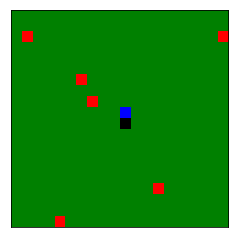

1.0 False
-10 2 1
-11 8 7
-12 19 4
-13 6 6
-14 16 13
-15 2 19
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB698408D0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69840128>


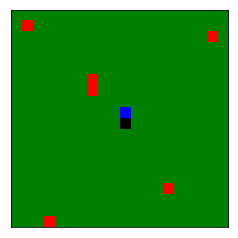

1.0 False
-10 1 1
-11 7 7
-12 19 3
-13 6 7
-14 16 14
-15 2 18
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB6ABDFDD8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB697ECE10>


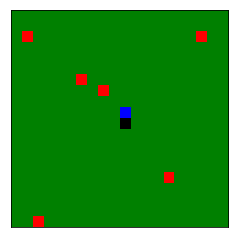

1.0 False
-10 2 1
-11 7 8
-12 19 2
-13 6 6
-14 15 14
-15 2 17
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AAF28D0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AAF2710>


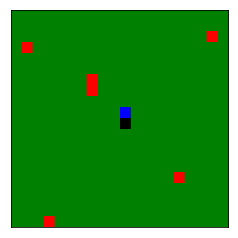

1.0 False
-10 3 1
-11 7 7
-12 19 3
-13 6 7
-14 15 15
-15 2 18
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB699A49E8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB699A4BA8>


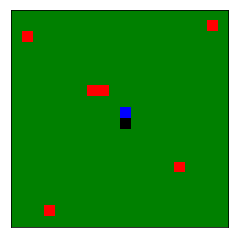

1.0 False
-10 2 1
-11 7 8
-12 18 3
-13 7 7
-14 14 15
-15 1 18
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB68F6EDA0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB68F6E588>


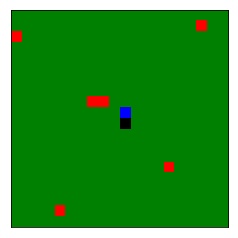

1.0 False
-10 2 0
-11 8 8
-12 18 4
-13 8 7
-14 14 14
-15 1 17
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AAC0828> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AAC06D8>


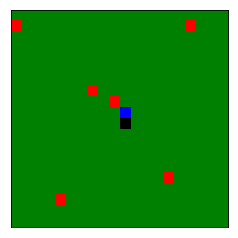

1.0 False
-10 1 0
-11 8 9
-12 17 4
-13 7 7
-14 15 14
-15 1 16
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB693939B0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB699D6BE0>


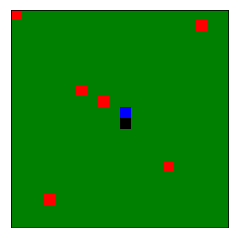

1.0 False
-10 0 0
-11 8 8
-12 17 3
-13 7 6
-14 14 14
-15 1 17
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB69901550> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB699016D8>


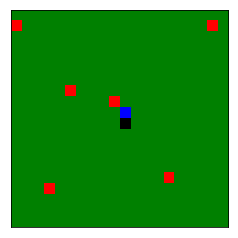

1.0 False
-10 1 0
-11 8 9
-12 16 3
-13 7 5
-14 15 14
-15 1 18
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB698E79E8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB698E7198>


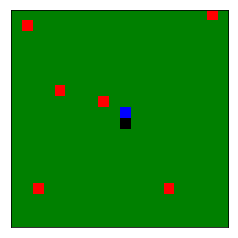

1.0 False
-10 1 1
-11 8 8
-12 16 2
-13 7 4
-14 16 14
-15 0 18
1 9 10
<matplotlib.colors.ListedColormap object at 0x000002BB69999748> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69999940>


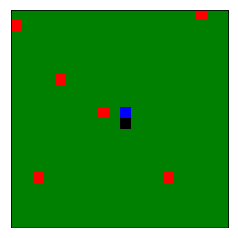

1.0 False
-10 1 0
-11 9 8
-12 15 2
-13 6 4
-14 15 14
-15 0 17
1 9 10
[(10, 10, 10)]
{(0, 0): -5, (0, 1): -3, (0, 2): -3, (0, 3): -5, (0, 4): -5, (0, 5): -3, (0, 6): -4, (0, 7): -4, (0, 8): -3, (0, 9): -3, (0, 10): -4, (0, 11): -3, (0, 12): -4, (0, 13): -3, (0, 14): -3, (0, 15): -5, (0, 16): -5, (0, 17): -3, (0, 18): -5, (0, 19): -5, (1, 0): -4, (1, 1): -4, (1, 2): -4, (1, 3): -5, (1, 4): -5, (1, 5): -3, (1, 6): -5, (1, 7): -3, (1, 8): -5, (1, 9): -3, (1, 10): -3, (1, 11): -4, (1, 12): -3, (1, 13): -3, (1, 14): -5, (1, 15): -5, (1, 16): -5, (1, 17): -5, (1, 18): -4, (1, 19): -4, (2, 0): -4, (2, 1): -4, (2, 2): -4, (2, 3): -4, (2, 4): -5, (2, 5): -5, (2, 6): -5, (2, 7): -5, (2, 8): -5, (2, 9): -4, (2, 10): -3, (2, 11): -3, (2, 12): -3, (2, 13): -4, (2, 14): -4, (2, 15): -3, (2, 16): -5, (2, 17): -4, (2, 18): -3, (2, 19): -4, (3, 0): -5, (3, 1): -5, (3, 2): -4, (3, 3): -5, (3, 4): -4, (3, 5): -4, (3, 6): -5, (3, 7): -4, (3, 8): -4, (3, 9): -4, (3, 10): -3, (3, 11): -4, (3, 12): -3, (3, 13

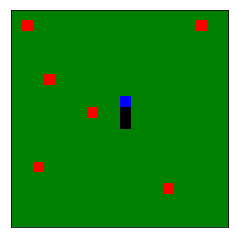

1.0 False
-10 1 1
-11 9 7
-12 14 2
-13 6 3
-14 16 14
-15 1 17
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AC1C320> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AC1CE80>


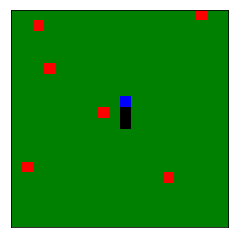

1.0 False
-10 1 2
-11 9 8
-12 14 1
-13 5 3
-14 15 14
-15 0 17
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB699D4240> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB699D4A20>


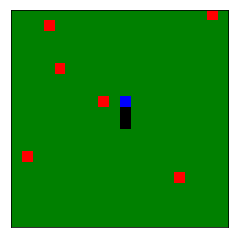

1.0 False
-10 1 3
-11 8 8
-12 13 1
-13 5 4
-14 15 15
-15 0 18
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB69329EB8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69329588>


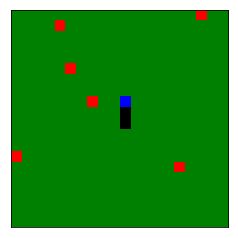

1.0 False
-10 1 4
-11 8 7
-12 13 0
-13 5 5
-14 14 15
-15 0 17
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB6AB9FAC8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AB9FBE0>


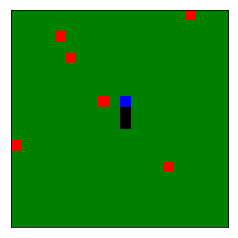

1.0 False
-10 2 4
-11 8 8
-12 12 0
-13 4 5
-14 14 14
-15 0 16
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB68FCDD30> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AB80438>


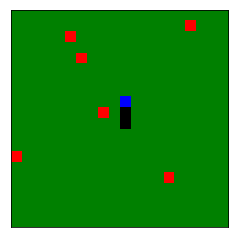

1.0 False
-10 2 5
-11 9 8
-12 13 0
-13 4 6
-14 15 14
-15 1 16
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB65752F60> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6981A358>


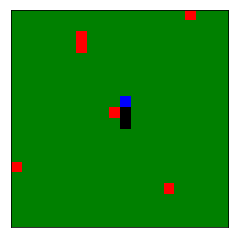

0.9878 False
-10 2 6
-11 9 9
-12 14 0
-13 3 6
-14 16 14
-15 0 16
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB68F819B0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB68F81EF0>


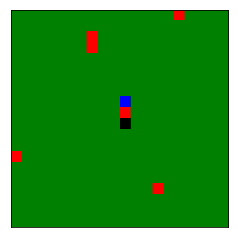

0.9638 False
-10 2 7
-11 9 10
-12 13 0
-13 3 7
-14 16 13
-15 0 15
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB6764F400> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB69A72CC0>


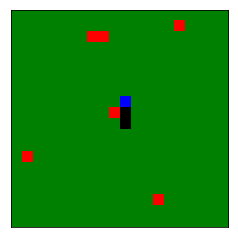

0.9288000000000002 False
-10 2 8
-11 9 9
-12 13 1
-13 2 7
-14 17 13
-15 1 15
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB699923C8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB6AAE7DA0>


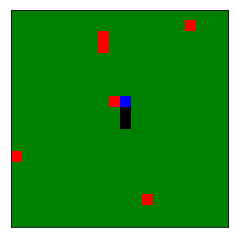

0.8512000000000004 False
-10 3 8
-11 8 9
-12 13 0
-13 2 8
-14 17 12
-15 1 16
1 8 10
<matplotlib.colors.ListedColormap object at 0x000002BB68F54E80> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x000002BB693277F0>


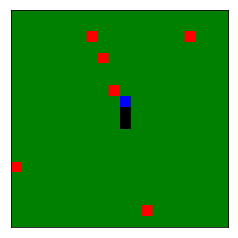

0 False


(33, 'Mort de faim', 0)

In [120]:
simulation_survie("moyen","Amazonie","jaguar",20)